In [11]:
# Link to Google Colab: https://colab.research.google.com/drive/1gYE65xeIHcS45zeLI59uJRXXiOUuH6mm?usp=sharing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file_url = 'https://raw.githubusercontent.com/lnguye782/ECGR-4105-Intro-to-ML/refs/heads/main/HW3/cancer.csv'
data = pd.read_csv(file_url)

data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
# Separate features and target variable (30 input features / 1 output target)
X = data.drop(columns=['target'])
Y = data['target']

In [5]:
# Split the data set into Training Data (80%) and Test Data (20%)
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [6]:
# Scale the data between 0 and 1 to get better accuracy
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [8]:
# Use PCA feature extraction for training
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Maximum number of features to consider
K_max = 30

for K in range(1, K_max + 1):
    pca = PCA(n_components=K)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    classifier_with_nb_and_pca = GaussianNB()
    classifier_with_nb_and_pca.fit(X_train_pca, Y_train)

    Y_pred_nb_and_pca = classifier_with_nb_and_pca.predict(X_test_pca)

    # Evaluate the model with PCA using model evaluation metrics: accuracy, precision, recall, and F1 score
    accuracy_scores.append(metrics.accuracy_score(Y_test, Y_pred_nb_and_pca))
    precision_scores.append(metrics.precision_score(Y_test, Y_pred_nb_and_pca))
    recall_scores.append(metrics.recall_score(Y_test, Y_pred_nb_and_pca))
    f1_scores.append(metrics.f1_score(Y_test, Y_pred_nb_and_pca))

In [9]:
# Identify the optimal number of principal components (K) for highest accuracy
optimal_K_nb_and_pca = accuracy_scores.index(max(accuracy_scores)) + 1
optimal_K_nb_and_pca, max(accuracy_scores)

(2, 0.9473684210526315)

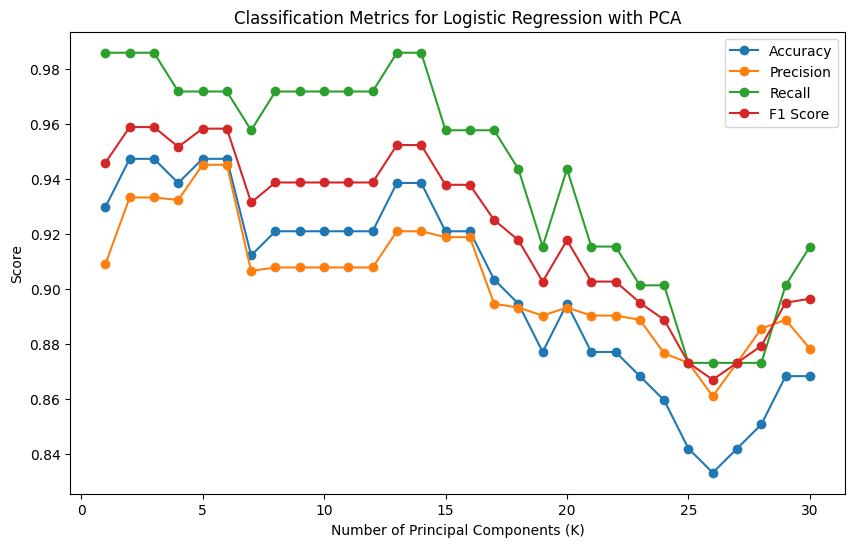

In [10]:
# Plot your classification accuracy, precision, recall, and F1 score over a different number of Ks
plt.figure(figsize=(10, 6))
plt.plot(range(1, K_max + 1), accuracy_scores, label='Accuracy', marker='o')
plt.plot(range(1, K_max + 1), precision_scores, label='Precision', marker='o')
plt.plot(range(1, K_max + 1), recall_scores, label='Recall', marker='o')
plt.plot(range(1, K_max + 1), f1_scores, label='F1 Score', marker='o')
plt.title('Classification Metrics for Logistic Regression with PCA')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Score')
plt.legend()